      Control Final : cette nootebook contient toutes les architectures CNN, VGG, VIT 
      Serialisation et evaluation

    Exploration du Dataset (Compréhension de notre base de données d’images)

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# PATHS
IMAGE_DIR = r'C:\Users\GK\OneDrive\Bureau\sabri-exam-tp\HAM500_images'
CSV_PATH = r'C:\Users\GK\OneDrive\Bureau\sabri-exam-tp\HAM500_metadata.csv'

# LIRE LE CSV
df = pd.read_csv(CSV_PATH, sep=';')
all_classes = df['label'].unique()
print("Toutes les classes dans le dataset :")
print(all_classes)

Toutes les classes dans le dataset :
['nv' 'mel' 'bkl' 'df' 'akiec' 'bcc' 'vasc']


    on considere nv-> malade , les autres -> Sain

In [14]:
df['filepath'] = df['image_id'].apply(lambda x: os.path.join(IMAGE_DIR, x + '.jpg'))
malade_labels = ['mel', 'bkl', 'akiec', 'df', 'vasc', 'bcc']
df['status'] = df['label'].apply(lambda x: 'malade' if x in malade_labels else 'sain')
# NOMBRE D’IMAGES PAR CLASSE
print("Nombre d’images par classe :")
print(df['status'].value_counts())

Nombre d’images par classe :
status
sain      332
malade    168
Name: count, dtype: int64


    Afficher une image de chaque class

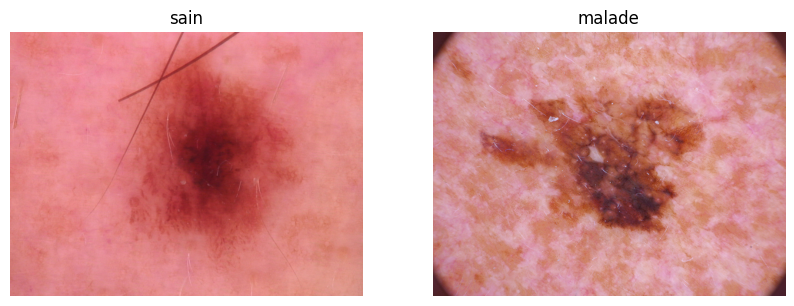

In [15]:
def show_one_image_per_class(df):
    classes = df['status'].unique()
    plt.figure(figsize=(10,4))
    for i, cls in enumerate(classes):
        img_path = df[df['status']==cls]['filepath'].iloc[0]
        img = Image.open(img_path)
        plt.subplot(1, len(classes), i+1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
    plt.show()

show_one_image_per_class(df)

    CNN from Scratch

  label  status  status_idx
0    nv    sain           0
1    nv    sain           0
2    nv    sain           0
3    nv    sain           0
4   mel  malade           1
Found 400 validated image filenames belonging to 2 classes.
Found 100 validated image filenames belonging to 2 classes.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 4, 4, 512)      │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4096)           │     2,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,194,594 (77.04 MB)

 Trainable params: 20,194,594 (77.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 674ms/step - accuracy: 0.6475 - loss: 0.6628 - val_accuracy: 0.6600 - val_loss: 0.6516
Epoch 2/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 668ms/step - accuracy: 0.6650 - loss: 0.6319 - val_accuracy: 0.6600 - val_loss: 0.6119
Epoch 3/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 647ms/step - accuracy: 0.6650 - loss: 0.6347 - val_accuracy: 0.6600 - val_loss: 0.5908
Epoch 4/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 718ms/step - accuracy: 0.6650 - loss: 0.6006 - val_accuracy: 0.6600 - val_loss: 0.6253
Epoch 5/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 798ms/step - accuracy: 0.6650 - loss: 0.6177 - val_accuracy: 0.6600 - val_loss: 0.6089
Epoch 6/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6650 - loss: 0.6378 - val_accuracy: 0.6600 - val_loss: 0.6404
Epoch 7/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 826ms/step - accuracy: 0.6650 - loss: 0.5622 - val_accuracy: 0.6600 - val_loss: 0.5543
Epoch 8/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 874ms/step - accuracy: 0.6700 - loss: 0.5228 - val_accuracy: 0.7100 -

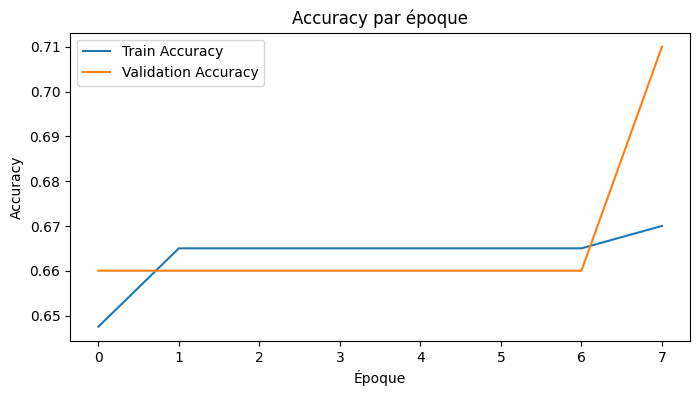

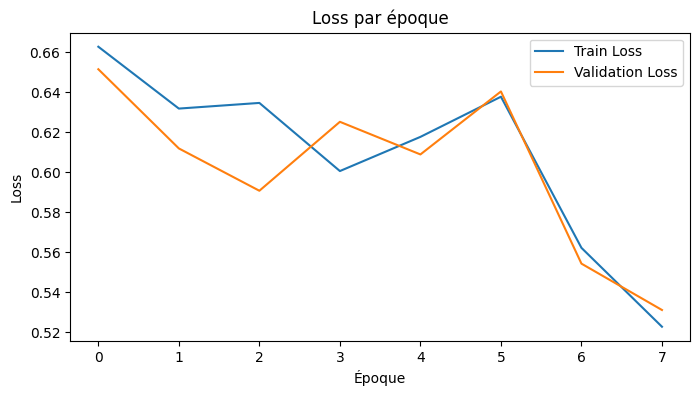

Modèle CNN sauvegardé dans models/cnn_from_scratch.h5


In [6]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# ==============================
# CONFIG
# ==============================
SEED = 42
BATCH_SIZE = 32
IMG_SIZE = 64
EPOCHS = 8
VAL_SPLIT = 0.2  # 20% validation
MALADE_LABEL = 'malade'  # Classe "Malade" pour métriques

tf.random.set_seed(SEED)
np.random.seed(SEED)

# ==============================
# DATASET CSV
# ==============================
IMAGE_DIR = r'C:\Users\GK\OneDrive\Bureau\sabri-exam-tp\HAM500_images'
CSV_PATH = r'C:\Users\GK\OneDrive\Bureau\sabri-exam-tp\HAM500_metadata.csv'

df = pd.read_csv(CSV_PATH, sep=';')

# Ajouter chemin complet
df['filepath'] = df['image_id'].apply(lambda x: os.path.join(IMAGE_DIR, x + '.jpg'))

# ==============================
# STATUS SAIN / MALADE
# ==============================
malade_labels = ['mel', 'bkl', 'akiec', 'df', 'vasc', 'bcc']  # Toutes les classes considérées comme "malade"
df['status'] = df['label'].apply(lambda x: 'malade' if x in malade_labels else 'sain')

# Map status vers indices
status_labels = df['status'].unique()
status_map = {status: idx for idx, status in enumerate(status_labels)}
df['status_idx'] = df['status'].map(status_map)

print(df[['label','status','status_idx']].head())

# ==============================
# SPLIT TRAIN / VALIDATION
# ==============================
train_df, val_df = train_test_split(
    df,
    test_size=VAL_SPLIT,
    random_state=SEED,
    stratify=df['status']  # stratification sur "sain/malade"
)

# ==============================
# GENERATORS
# ==============================
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_dataframe(
    train_df,
    x_col='filepath',
    y_col='status',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',  # classification binaire: sain/malade
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

val_gen = datagen.flow_from_dataframe(
    val_df,
    x_col='filepath',
    y_col='status',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False,
    seed=SEED
)

# ==============================
# CNN FROM SCRATCH
# ==============================
def build_cnn(input_shape=(64,64,3), num_classes=2):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3,3), padding='same', activation='relu')(inputs)
    x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
    x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
    x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(256, (3,3), padding='same', activation='relu')(x)
    x = Conv2D(256, (3,3), padding='same', activation='relu')(x)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(512, (1,1), padding='valid', activation='relu')(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

model = build_cnn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ==============================
# TRAIN
# ==============================
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

# ==============================
# EVALUATION
# ==============================
val_gen.reset()
y_true = val_gen.classes
y_pred_probs = model.predict(val_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

# Accuracy globale
acc = accuracy_score(y_true, y_pred)

# Index de la classe "Malade"
malade_idx = status_map['malade']

# Precision, Recall, F1 pour la classe "Malade"
prec = precision_score(y_true, y_pred, labels=[malade_idx], average='macro')
rec = recall_score(y_true, y_pred, labels=[malade_idx], average='macro')
f1 = f1_score(y_true, y_pred, labels=[malade_idx], average='macro')

print(f"Classe Malade: {MALADE_LABEL}")
print(f"Accuracy globale: {acc:.4f}")
print(f"Precision (classe Malade): {prec:.4f}")
print(f"Recall (classe Malade): {rec:.4f}")
print(f"F1-score (classe Malade): {f1:.4f}")

# Rapport complet
target_names_status = list(status_map.keys())
print("\nClassification Report complet Sain/Malade:")
print(classification_report(y_true, y_pred, target_names=target_names_status))

# ==============================
# COURBES
# ==============================
# Accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy par époque")
plt.xlabel("Époque")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss par époque")
plt.xlabel("Époque")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Sauvegarde le modèle
model.save("models/cnn_from_scratch.h5")
print("Modèle CNN sauvegardé dans models/cnn_from_scratch.h5")

     VGG

Found 644 validated image filenames belonging to 2 classes.
Found 100 validated image filenames belonging to 2 classes.
Epoch 1/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 742ms/step - accuracy: 0.5714 - loss: 5.2186 - val_accuracy: 0.7500 - val_loss: 0.5603 - learning_rate: 0.0010
Epoch 2/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 705ms/step - accuracy: 0.6863 - loss: 0.8765 - val_accuracy: 0.2000 - val_loss: 1.0598 - learning_rate: 0.0010
Epoch 3/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 691ms/step - accuracy: 0.7205 - loss: 0.6368 - val_accuracy: 0.2000 - val_loss: 1.2854 - learning_rate: 0.0010
Epoch 4/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 713ms/step - accuracy: 0.7050 - loss: 0.6773 - val_accuracy: 0.2000 - val_loss: 0.8456 - learning_rate: 0.0010
Epoch 5/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 753ms/step - accuracy: 0.7438 - loss: 0.5207 - val_accuracy: 0.4900 - val_loss: 0.7042 - learning_rate: 5.0000e-04
Epoch 6/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 725ms/step - accuracy: 0.7624 - loss: 0.4835 - val_accuracy: 0.3000 - val_l

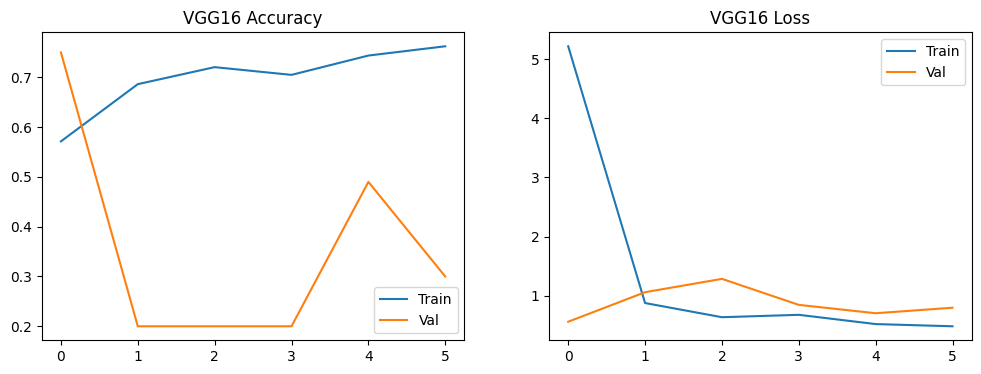

Modèle sauvegardé : models/vgg16_from_scratch.keras


In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, class_weight
from sklearn.metrics import classification_report

# ==========================================
# 1. CONFIGURATION DES CHEMINS ET PARAMS
# ==========================================
IMAGE_DIR = r'C:\Users\GK\OneDrive\Bureau\sabri-exam-tp\HAM500_images'
CSV_PATH   = r'C:\Users\GK\OneDrive\Bureau\sabri-exam-tp\HAM500_metadata.csv'

IMG_HEIGHT, IMG_WIDTH = 64, 64
BATCH_SIZE = 32
EPOCHS = 8  # EarlyStopping arrêtera si pas de progrès

# ==========================================
# 2. CHARGEMENT ET PRÉPARATION
# ==========================================
df = pd.read_csv(CSV_PATH, sep=";")
df.columns = df.columns.str.strip()
df["image_id"] = df["image_id"].astype(str).str.replace(".jpg","", case=False).apply(lambda x: x+".jpg")

# Vérification fichiers existants
df = df[df["image_id"].apply(lambda x: os.path.exists(os.path.join(IMAGE_DIR, x)))]

# Étiquetage binaire
sick_classes = ["mel","bcc","akiec"]
df["label"] = df["label"].isin(sick_classes).astype(int)

# Split 80/20
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["label"])

# Oversampling minoritaire
train_majority = train_df[train_df["label"]==0]
train_minority = train_df[train_df["label"]==1]
train_minority_upsampled = resample(train_minority, replace=True, n_samples=len(train_majority), random_state=42)
train_balanced = pd.concat([train_majority, train_minority_upsampled]).sample(frac=1, random_state=42)

train_balanced["label"] = train_balanced["label"].astype(str)
val_df["label"] = val_df["label"].astype(str)

# ==========================================
# 3. DATA AUGMENTATION
# ==========================================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_iterator = train_datagen.flow_from_dataframe(
    train_balanced, directory=IMAGE_DIR,
    x_col="image_id", y_col="label", target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode="sparse", batch_size=BATCH_SIZE, shuffle=True
)

val_iterator = val_datagen.flow_from_dataframe(
    val_df, directory=IMAGE_DIR,
    x_col="image_id", y_col="label", target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode="sparse", batch_size=BATCH_SIZE, shuffle=False
)

# ==========================================
# 4. BUILD VGG16 AMÉLIORÉ
# ==========================================
def build_vgg16_improved(input_shape=(IMG_HEIGHT, IMG_WIDTH,3)):
    inp = Input(shape=input_shape)

    # Bloc 1
    x = Conv2D(32,(3,3),padding='same',activation='relu')(inp)
    x = BatchNormalization()(x)
    x = Conv2D(32,(3,3),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.2)(x)

    # Bloc 2
    x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.3)(x)

    # Bloc 3
    x = Conv2D(128,(3,3),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128,(3,3),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.4)(x)

    # Classification head
    x = Flatten()(x)
    x = Dense(512,activation='relu')(x)
    x = Dropout(0.5)(x)
    out = Dense(2,activation='softmax')(x)

    return Model(inp, out)

vgg_model = build_vgg16_improved()
vgg_model.compile(optimizer=Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# ==========================================
# 5. CLASS WEIGHTS
# ==========================================
class_weights_values = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_balanced["label"].astype(int)),
    y=train_balanced["label"].astype(int)
)
class_weights_dict = dict(enumerate(class_weights_values))

# ==========================================
# 6. CALLBACKS
# ==========================================
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ==========================================
# 7. TRAINING
# ==========================================
history = vgg_model.fit(
    train_iterator,
    validation_data=val_iterator,
    epochs=EPOCHS,
    class_weight=class_weights_dict,
    callbacks=[reduce_lr, early_stop]
)

# ==========================================
# 8. EVALUATION
# ==========================================
val_probs = vgg_model.predict(val_iterator)
val_preds = np.argmax(val_probs, axis=1)
val_true  = val_df["label"].astype(int).values

print("\n--- RAPPORT VGG16 AMÉLIORÉ ---")
print(classification_report(val_true, val_preds, target_names=["Saine","Malade"]))

# Courbes
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('VGG16 Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('VGG16 Loss')
plt.legend()
plt.show()

# ==========================================
# 9. SAUVEGARDE DU MODÈLE
# ==========================================
os.makedirs("models", exist_ok=True)
vgg_model.save("models/vgg16_from_scratch.keras")
print("Modèle sauvegardé : models/vgg16_from_scratch.keras")

     VIT


--- Training ViT-1 (Depth=1) ---
Epoch 1/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 0.6250 - loss: 1.8092 - val_accuracy: 0.6600 - val_loss: 0.8380
Epoch 2/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 274ms/step - accuracy: 0.6650 - loss: 1.0999 - val_accuracy: 0.6600 - val_loss: 0.8519
Epoch 3/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - accuracy: 0.6650 - loss: 1.0757 - val_accuracy: 0.6600 - val_loss: 0.8140
Epoch 4/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 286ms/step - accuracy: 0.6650 - loss: 1.0673 - val_accuracy: 0.6600 - val_loss: 0.7806
Epoch 5/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - accuracy: 0.6650 - loss: 1.0709 - val_accuracy: 0.6600 - val_loss: 0.7886
Epoch 6/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 297ms/step - accuracy: 0.6650 - loss: 1.0623 - val_accuracy: 0.6600 - val_loss: 0.7738
Epoch 7/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.6650 - loss: 1.0586 - val_accuracy: 0.6600 - val_loss: 0.7698
Epoch 8/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 295ms/step - accuracy: 0.6650 - loss:

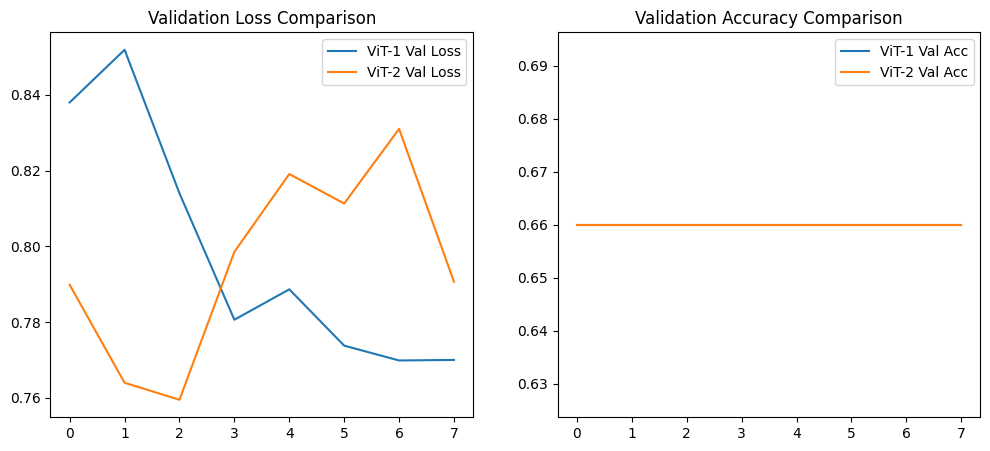

In [5]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# -----------------------------
# CONFIG
# -----------------------------
DATA_DIR = r'C:\Users\GK\OneDrive\Bureau\sabri-exam-tp\HAM500_images'
CSV_PATH = r'C:\Users\GK\OneDrive\Bureau\sabri-exam-tp\HAM500_metadata.csv'
IMG_SIZE = 64
PATCH_SIZE = 8
D_MODEL = 64
N_HEADS = 4
MLP_RATIO = 2
DROPOUT = 0.1
BATCH_SIZE = 32
EPOCHS = 8
LR = 1e-3
SEED = 42
BENIGN_CLASSES = ['mel', 'bkl', 'akiec', 'df', 'vasc', 'bcc']

# -----------------------------
# REPRODUCIBILITY
# -----------------------------
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# -----------------------------
# DATA AUGMENTATION
# -----------------------------
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomContrast(0.1),
])

# -----------------------------
# LOAD DATASET
# -----------------------------
def preprocess_image(img_path, label):
    try:
        img = tf.keras.utils.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    except:
        img = tf.keras.utils.array_to_img(np.zeros((IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8))
    img = tf.keras.utils.img_to_array(img) / 255.0
    lbl = 0 if label in BENIGN_CLASSES else 1
    return img, lbl

def create_dataset(df, img_dir):
    imgs, labels = [], []
    for idx, row in df.iterrows():
        img_path = os.path.join(img_dir, f"{row['image_id']}.jpg")
        img, lbl = preprocess_image(img_path, row['label'])
        imgs.append(img)
        labels.append(lbl)
    return np.array(imgs), np.array(labels)

full_df = pd.read_csv(CSV_PATH, sep=';')
train_df, val_df = train_test_split(
    full_df, test_size=0.2, random_state=SEED, stratify=full_df['label']
)
x_train, y_train = create_dataset(train_df, DATA_DIR)
x_val, y_val = create_dataset(val_df, DATA_DIR)

# -----------------------------
# VIT-LIKE MODEL
# -----------------------------
def create_vit_model(depth=1):
    input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Data augmentation
    x = data_augmentation(input_layer)
    
    # Patch embedding
    num_patches = (IMG_SIZE // PATCH_SIZE) ** 2
    x = layers.Conv2D(D_MODEL, kernel_size=PATCH_SIZE, strides=PATCH_SIZE)(x)
    x = layers.Reshape((num_patches, D_MODEL))(x)
    
    # CLS token
    cls_token = tf.Variable(tf.zeros((1,1,D_MODEL)), trainable=True)
    def add_cls(inputs):
        batch = tf.shape(inputs)[0]
        cls_tokens = tf.tile(cls_token, [batch,1,1])
        return tf.concat([cls_tokens, inputs], axis=1)
    x = layers.Lambda(add_cls)(x)
    
    # Positional embedding
    pos_embed = tf.Variable(tf.zeros((1, num_patches+1, D_MODEL)), trainable=True)
    x = x + pos_embed
    
    # Transformer Encoder
    for _ in range(depth):
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)
        attn_out = layers.MultiHeadAttention(num_heads=N_HEADS, key_dim=D_MODEL)(x1, x1)
        x2 = layers.Add()([attn_out, x])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(D_MODEL*MLP_RATIO, activation='relu')(x3)
        x3 = layers.Dense(D_MODEL)(x3)
        x = layers.Add()([x2, x3])
    
    # Classification Head (VGG-like)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    cls_out = layers.Lambda(lambda z: z[:,0,:])(x)
    x = layers.Dense(4096, activation='relu')(cls_out)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(2, activation='softmax')(x)
    
    model = models.Model(inputs=input_layer, outputs=output)
    return model

# -----------------------------
# TRAIN FUNCTION
# -----------------------------
def train_vit(depth=1, model_name="ViT"):
    print(f"\n--- Training {model_name} (Depth={depth}) ---")
    model = create_vit_model(depth=depth)
    
    # Weighted loss
    class_weights = {0:1.0, 1:4.0}
    
    model.compile(
        optimizer=optimizers.Adam(learning_rate=LR),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        class_weight=class_weights
    )
    
    # Evaluation
    y_pred = np.argmax(model.predict(x_val), axis=1)
    acc = accuracy_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred, pos_label=1)
    prec = precision_score(y_val, y_pred, pos_label=1)
    f1 = f1_score(y_val, y_pred, pos_label=1)
    
    print(f"Validation Metrics for {model_name}:")
    print(f"Accuracy: {acc:.4f} | Recall (Malade): {rec:.4f} | Precision: {prec:.4f} | F1-score: {f1:.4f}")
    
    # Save model
    os.makedirs("models", exist_ok=True)
    path = f"models/{model_name.lower()}_model.keras"
    model.save(path)
    print(f"Model saved to {path}")
    
    return history

# -----------------------------
# MAIN
# -----------------------------
if __name__ == "__main__":
    hist1 = train_vit(depth=1, model_name="ViT-1")
    hist2 = train_vit(depth=2, model_name="ViT-2")
    
    # Plot Accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(hist1.history['val_loss'], label='ViT-1 Val Loss')
    plt.plot(hist2.history['val_loss'], label='ViT-2 Val Loss')
    plt.title("Validation Loss Comparison")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(hist1.history['val_accuracy'], label='ViT-1 Val Acc')
    plt.plot(hist2.history['val_accuracy'], label='ViT-2 Val Acc')
    plt.title("Validation Accuracy Comparison")
    plt.legend()
    
    plt.show()
